# Research on apartment sales ads

You will have the data from a real estate agency. It is an archive of sales ads for realty in St. Petersburg, Russia, and the surrounding areas collected over the past few years. You’ll need to learn how to determine the market value of real estate properties. Your task is to define the parameters. This will make it possible to build an automated system that is capable of detecting anomalies and fraudulent activity.

There are two different types of data available for every apartment for sale. The first type is a user’s input. The second type is received automatically based upon the map data. For example, the distance from the city center, airport, the nearest park or body of water. 

### Step 1. Open the data file and study the general information. 

In [1]:
import pandas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data = pd.read_csv('/datasets/real_estate_data_us.csv', sep='\t')

uploaded file and read it but it came out all together so had to separate it and used the function sep=
Also added library to be able to create graphs

In [2]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
date_posted          23699 non-null object
days_listed          20518 non-null float64
last_price           23699 non-null float64
bedrooms             23699 non-null int64
kitchen_area         21421 non-null float64
living_area          21796 non-null float64
total_area           23699 non-null float64
balconies            12180 non-null float64
ceiling_height       14504 non-null float64
floors_total         23613 non-null float64
floor                23699 non-null int64
total_images         23699 non-null int64
bike_parking         2775 non-null object
is_studio            23699 non-null bool
is_open_plan         23699 non-null bool
locality_name        23650 non-null object
airport_dist         18157 non-null float64
city_center_dist     18180 non-null float64
park_dist            8079 non-null float64
parks_within_3000    18181 non-null float64
pond_dist            9110 no

There are 23699 entries of data. days_listed has only 20518, kitchen_area has only 21421, living_area has only 21796, balconies has only 12180, ceiling-height has only 14504, floors_total has only 23613, bike-parking has only 2775, locality_name has only 23650, airport_dist has only 18157, city_center_dist has only 18180, park_dist has only 8079, parks_within_3000 has only 18181, pond_dist has only 9110, and ponds_within_3000 has only 18181

In [3]:
data.head()

,date_posted,days_listed,last_price,bedrooms,kitchen_area,living_area,total_area,balconies,ceiling_height,floors_total,...,bike_parking,is_studio,is_open_plan,locality_name,airport_dist,city_center_dist,park_dist,parks_within_3000,pond_dist,ponds_within_3000
0,2019-03-07T00:00:00,NaN,260000.0,3,25.0,51.0,108.0,NaN,2.70,16.0,...,NaN,False,False,Saint Petersburg,18863.0,16028.0,482.0,1.0,755.0,2.0
1,2018-12-04T00:00:00,81.0,67000.0,1,11.0,18.6,40.4,2.0,NaN,11.0,...,NaN,False,False,Shushary village,12817.0,18603.0,NaN,0.0,NaN,0.0
2,2015-08-20T00:00:00,558.0,103920.0,2,8.3,34.3,56.0,0.0,NaN,5.0,...,NaN,False,False,Saint Petersburg,21741.0,13933.0,90.0,1.0,574.0,2.0
3,2015-07-24T00:00:00,424.0,1298000.0,3,NaN,NaN,159.0,0.0,NaN,14.0,...,NaN,False,False,Saint Petersburg,28098.0,6800.0,84.0,2.0,234.0,3.0
4,2018-06-19T00:00:00,121.0,200000.0,2,41.0,32.0,100.0,NaN,3.03,14.0,...,NaN,False,False,Saint Petersburg,31856.0,8098.0,112.0,2.0,48.0,1.0


Most of the data is float type and will need to change some data to integer

In [4]:
data.describe()

,days_listed,last_price,bedrooms,kitchen_area,living_area,total_area,balconies,ceiling_height,floors_total,floor,total_images,airport_dist,city_center_dist,park_dist,parks_within_3000,pond_dist,ponds_within_3000
count,20518.000000,2.369900e+04,23699.000000,21421.000000,21796.000000,23699.000000,12180.000000,14504.000000,23613.000000,23699.000000,23699.000000,18157.000000,18180.000000,8079.000000,18181.000000,9110.000000,18181.000000
mean,180.888634,1.308310e+05,2.070636,10.569807,34.457852,60.348651,1.150082,2.771499,10.673824,5.892358,9.858475,28793.672193,14191.277833,490.804555,0.611408,517.980900,0.770255
std,219.727988,2.177403e+05,1.078405,5.905438,22.030445,35.654083,1.071300,1.261056,6.597173,4.885249,5.682529,12630.880622,8608.386210,342.317995,0.802074,277.720643,0.938346
min,1.000000,2.440000e+02,0.000000,1.300000,2.000000,12.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,181.000000,1.000000,0.000000,13.000000,0.000000
25%,45.000000,6.800000e+04,1.000000,7.000000,18.600000,40.000000,0.000000,2.520000,5.000000,2.000000,6.000000,18585.000000,9238.000000,288.000000,0.000000,294.000000,0.000000
50%,95.000000,9.300000e+04,2.000000,9.100000,30.000000,52.000000,1.000000,2.650000,9.000000,4.000000,9.000000,26726.000000,13098.500000,455.000000,0.000000,502.000000,1.000000
75%,232.000000,1.360000e+05,3.000000,12.000000,42.300000,69.900000,2.000000,2.800000,16.000000,8.000000,14.000000,37273.000000,16293.000000,612.000000,1.000000,729.000000,1.000000
max,1580.000000,1.526000e+07,19.000000,112.000000,409.700000,900.000000,5.000000,100.000000,60.000000,33.000000,50.000000,84869.000000,65968.000000,3190.000000,3.000000,1344.000000,3.000000


0 bedrooms must be studios.  
Weird data is ceiling_height of 1 and 100 meters
Also total_area of 900 square meters
That is one huge property!


In [5]:
data.isnull().sum()

date_posted              0
days_listed           3181
last_price               0
bedrooms                 0
kitchen_area          2278
living_area           1903
total_area               0
balconies            11519
ceiling_height        9195
floors_total            86
floor                    0
total_images             0
bike_parking         20924
is_studio                0
is_open_plan             0
locality_name           49
airport_dist          5542
city_center_dist      5519
park_dist            15620
parks_within_3000     5518
pond_dist            14589
ponds_within_3000     5518
dtype: int64

There are a lot of missing values here. The mapping distances must have not done the best job because it has a lot of missing data. We really only need city_center_dist for our analysis though

In [6]:
data.duplicated().sum()

0

No duplicates

### Conclusion

I checked the data. There are no duplications. 

There are missing values in days_listed which I decided to leave because it may be that the properties were just not sold yet and I can still make calculations with it since it is float

There are missing values in kitchen_area and living_area. I need them for ana

There are missing values in balconies. I will assume that this means the property does not have a balcony and will fill in the values with 0. Same with bik_parking where there is no parking for bikes by the property.

There are missing values in ceiling_height. 

There are missing values in floors_total. I will assumed that the missing value is 1 because the floor is probably ground level

There are missing values in locality_name. I will leave this blank since it is negligible for our data since most important is St. Petersburg which already has a significant number of values for our data.





### Step 2. Data preprocessing

In [7]:
data['balconies'] = data['balconies'].fillna(0)

In [8]:
data['bike_parking'] = data['bike_parking'].fillna(0)

In [9]:
data['bike_parking'].isnull().sum()

0

In [10]:
data['balconies'].isnull().sum()

0

Filled balconies and bike_parking column with 0 and came back with no missing values.

In [11]:
data['floors_total'] = data['floors_total'].fillna(1)

In [12]:
data['floors_total'].isnull().sum()

0

Filled floors total column with 1 for ground floor and came back with no missing values

In [13]:
data['bedrooms'] = data['bedrooms'].replace(0,1) 

Replaced all bedrooms values that had 0 to 1 because I consider 1 room to be studio and whoever filled out may have thought 0 is appropriate for a studio but I would like to consider bedrooms to only start with 1

In [14]:
data['city_center_dist']= data['city_center_dist'].fillna(data.groupby('locality_name')['city_center_dist'].transform('mean'),inplace=True)

Filled values for city center dist. Was not able to fill them all.

In [15]:
data['city_center_dist'].isnull().sum()

4872

In [16]:
null_diff = 5519 - 4872
print(null_diff)

647


Was able to fill 647 rows with the average for city center dist column baed on locality name

In [17]:
data['kitchen_area'] = np.where(data['is_studio'] == True, data['kitchen_area'].fillna(value='0'), data['kitchen_area'])
data['kitchen_area'] = data['kitchen_area'].fillna(value='0')

In [18]:
data['living_area'] = np.where(data['is_studio'] == True, data['living_area'].fillna(data['total_area']), data['living_area'])
data['living_area'].fillna(data.groupby('bedrooms')['living_area'].transform('median'),inplace=True)

In [19]:
data.isnull().sum()

date_posted              0
days_listed           3181
last_price               0
bedrooms                 0
kitchen_area             0
living_area              0
total_area               0
balconies                0
ceiling_height        9195
floors_total             0
floor                    0
total_images             0
bike_parking             0
is_studio                0
is_open_plan             0
locality_name           49
airport_dist          5542
city_center_dist      4872
park_dist            15620
parks_within_3000     5518
pond_dist            14589
ponds_within_3000     5518
dtype: int64

I'm still left with many missing values but most of these I will not need for my analysis

### 2.1 Data type replacement

In [20]:
data['date_posted'] = pd.to_datetime(data['date_posted'])

Changed date_posted column to datetime which will make it easier to break it down later into columns for weekday, month, and year

In [21]:
data['last_price'] = data['last_price'].astype('int')

Changed last price to integer datatype

In [22]:
data['total_area'] = data['total_area'].astype('int')

changed total area to integer datatype

In [23]:
data['balconies'] = data['balconies'].astype('int')

changed balconies to integer datatype

In [24]:
data['floors_total'] = data['floors_total'].astype('int')

changed floors total to integer datatype

In [25]:
data['kitchen_area'] = data['kitchen_area'].astype('int')

changed kitchen area to integer datatype

In [26]:
data.dtypes

date_posted          datetime64[ns]
days_listed                 float64
last_price                    int64
bedrooms                      int64
kitchen_area                  int64
living_area                 float64
total_area                    int64
balconies                     int64
ceiling_height              float64
floors_total                  int64
floor                         int64
total_images                  int64
bike_parking                 object
is_studio                      bool
is_open_plan                   bool
locality_name                object
airport_dist                float64
city_center_dist            float64
park_dist                   float64
parks_within_3000           float64
pond_dist                   float64
ponds_within_3000           float64
dtype: object

Showing changes of datatypes

### Step 3. Make calculations and add them to the table

In [27]:
data['price_per_square_meter'] = data['last_price']/data['total_area']        

Created column with price per square meter calculation

In [28]:
data['weekday_posted'] = data['date_posted'].dt.weekday

In [29]:
data['month_posted'] = data['date_posted'].dt.month

In [30]:
data['year_posted'] = data['date_posted'].dt.year

Created columns showing specific day of the week, the month, and the year that the ad was posted

In [31]:
def categorize_floor(row):
    floor = row['floor']
    floors_total = row['floors_total']
    if floor == 1:
        return  1
    elif floor != 1:
        if floor == floors_total:
            return  3
        else:
            return  2
           
data['floor_category'] = data.apply(categorize_floor, axis=1)

created a column which will show which floor the property is on in the building, either first floor(1), last floor(3), or other(2). I kept these as numbers in order to be able to use them in analysis later. 

In [32]:
data['living_area_ratio'] = data['living_area'] / data['total_area']

Created the ratio for living area of total area. The data may be a little off here in certain rows because I did not fill values for living area. 

In [33]:
data['kitchen_area_ratio'] = data['kitchen_area'] / data['total_area']
   

Created the ratio for kitchen area of total area. The data may be a little off here in certain rows because I did not fill values for kitchen area.

### Step 4. Conduct exploratory data analysis and follow the instructions below:

##### Carefully investigate the following parameters: square area, price, number of rooms, and ceiling height. Plot a histogram for each parameter

### Investigating Square area

In [34]:
data['total_area'].describe()

count    23699.000000
mean        60.120511
std         35.665822
min         12.000000
25%         40.000000
50%         52.000000
75%         69.000000
max        900.000000
Name: total_area, dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f895ec3a390>]],
      dtype=object)

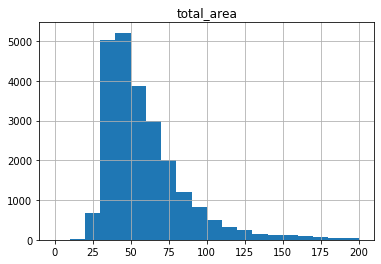

In [35]:
data.hist('total_area', range= (0, 200), bins=20)

There is a long tail here. Most of the data looks to be between 40 square meters and 200 square meters. Above 200 square meters are my outliers. 

### Investigating price

In [36]:
data['last_price'].describe()

count    2.369900e+04
mean     1.308310e+05
std      2.177403e+05
min      2.440000e+02
25%      6.800000e+04
50%      9.300000e+04
75%      1.360000e+05
max      1.526000e+07
Name: last_price, dtype: float64

Only one property is very high close to 1.6 and this one is an outlier. Probably very big and very expensive. Everything else is around the same price range.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f895ec2c6d0>]],
      dtype=object)

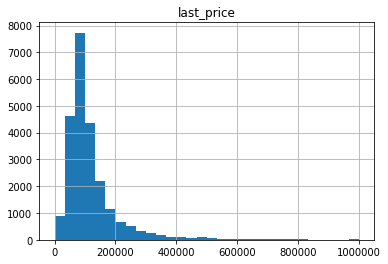

In [37]:
data.hist('last_price', range=(0, 0.1e+07), bins= 30)

This is right tailed and there is a spike at around 100000. The mean is 130000 and the median is 93000.
Most properties are within the same price range of 50000 to 100000

### Investigating Rooms

In [38]:
data['bedrooms'].describe()

count    23699.000000
mean         2.078948
std          1.066196
min          1.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         19.000000
Name: bedrooms, dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f895e418410>]],
      dtype=object)

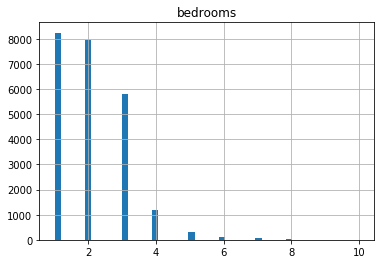

In [39]:
data.hist('bedrooms', range=(1,10), bins=50)

We can see that most of our properties have less than 2.5 rooms. The most is 1 bedroom. The 0 bedrooms I replaced with 1 bedroom assuming are studios and therefore also considered 1 bedroom. 

### Investigating Ceiling height

In [40]:
data['ceiling_height'].describe()

count    14504.000000
mean         2.771499
std          1.261056
min          1.000000
25%          2.520000
50%          2.650000
75%          2.800000
max        100.000000
Name: ceiling_height, dtype: float64

Most of the data is within 2 meters. The max is way bigger than any of the data and definitely does not fit with our data.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f895dfc9090>]],
      dtype=object)

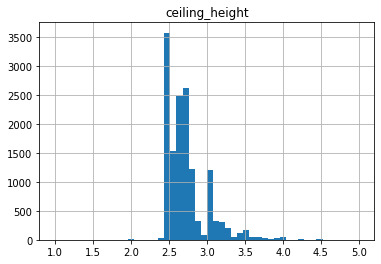

In [45]:
data.hist('ceiling_height', range= (1,5), bins=50)

Can see that most of the ceiling height is around 2.5 to 3.0 meters. 

### Conclusion

After investigating square meters, price, rooms, and ceiling height I see that most of the properties are small and the price range may reflect that.

### Examination of the time it takes to sell an apartment

In [46]:
data['days_listed'].describe()

count    20518.000000
mean       180.888634
std        219.727988
min          1.000000
25%         45.000000
50%         95.000000
75%        232.000000
max       1580.000000
Name: days_listed, dtype: float64

In [47]:
print('Average time to sell: {:.2f}'.format(180.88)) 

Average time to sell: 180.88


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f895de35690>]],
      dtype=object)

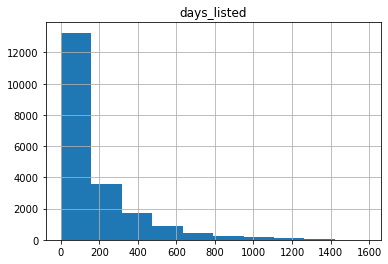

In [48]:
data.hist('days_listed')

The average time for a sale is 180 days. I believe sales are happening rather quickly if it is less than 45 days since the peak of sales is around 45 days. Sales are taking an extra long time if it is passed 232 days since the average time is about 180 days. However since the distribution of the data is abnormal and we have apartments that are taking an extra long time to sell which skews the numbers we may want to look at other numbers than the quartiles that we have. 

### Removing rare and outlying values

In [49]:
data = data[data['total_area'] < 400]
data = data[data['bedrooms'] < 5]
data = data[data['ceiling_height'] < 80]

At first I tried to use the IQR method to identify and remove outliers from the data, defining the cut-off values as (Q1 - 1.5 * IQR, Q3 + 1.5 * IQR) but after having heard from other students and Anastasia herself that this might not be the best option I decided to choose my own outliers. Our data is not normal distribution so the IQR method would not work very well with that and it could remove a lot of data that we may need.

I chose less than 400 for total area because I know that most of the data is within 200 total meters. I chose 5 bedrooms because as well most of the data is within 1 and 2 bedrooms. I chose ceiling height as less than 80. I could not think of a specific spot for ceiling height to choose from but I know that there is the outlier of 100 in height and so I would definitely be removing that.


### Step 4.4: Finding factors with the biggest influence on an apartment’s price

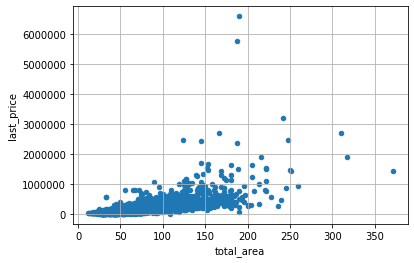

Correlation coefficient: 0.6


In [50]:
data.plot(x='total_area', y='last_price', kind='scatter', grid=True)
plt.show()
print('Correlation coefficient: {:.1f}'.format(data['last_price'].corr(data['total_area'])))


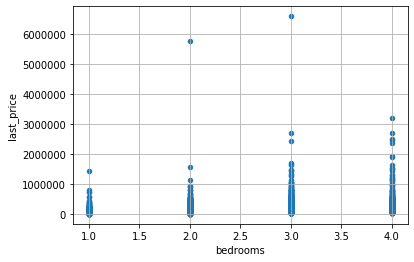

Correlation coefficient: 0.3


In [51]:
data.plot(x='bedrooms', y='last_price', kind='scatter', grid=True)
plt.show()
print('Correlation coefficient: {:.1f}'.format(data['last_price'].corr(data['bedrooms'])))

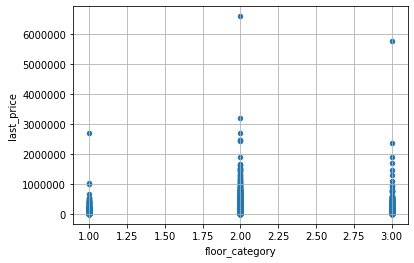

Correlation coefficient: 0.1


In [52]:
data.plot(x='floor_category', y='last_price', kind='scatter', grid=True)
plt.show()
print('Correlation coefficient: {:.1f}'.format(data['price_per_square_meter'].corr(data['floor'])))

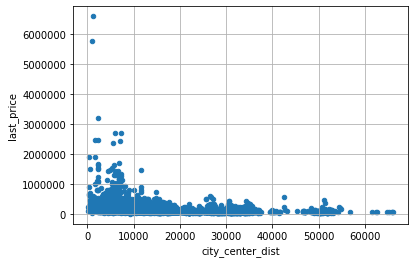

Correlation coefficient: -0.3


In [53]:
data.plot(x='city_center_dist', y='last_price', kind='scatter', grid=True)
plt.show()
print('Correlation coefficient: {:.1f}'.format(data['price_per_square_meter'].corr(data['city_center_dist'])))

Correlation coefficient: -0.0


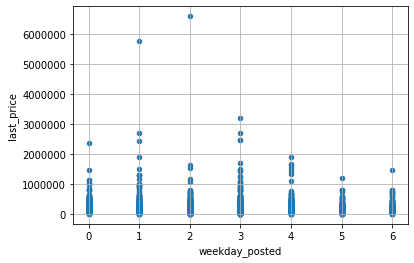

In [54]:
data.plot(x='weekday_posted', y='last_price', kind='scatter', grid=True)
print('Correlation coefficient: {:.1f}'.format(data['price_per_square_meter'].corr(data['weekday_posted'])))

Correlation coefficient: -0.0


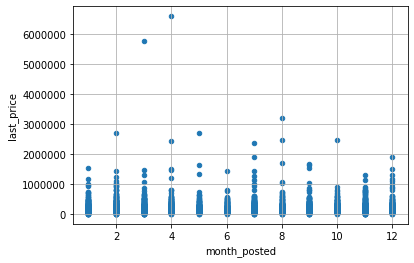

In [55]:
data.plot(x='month_posted', y='last_price', kind='scatter', grid=True)
print('Correlation coefficient: {:.1f}'.format(data['price_per_square_meter'].corr(data['month_posted'])))

Correlation coefficient: 0.0


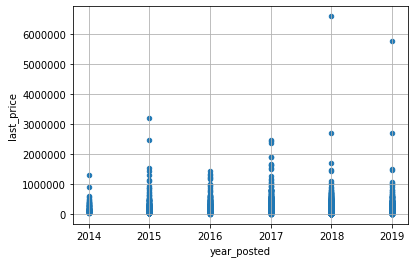

In [56]:
data.plot(x='year_posted', y='last_price', kind='scatter', grid=True)
print('Correlation coefficient: {:.1f}'.format(data['price_per_square_meter'].corr(data['year_posted'])))

### Conclusion

The price is affected most by total area of the property and next by bedrooms. The rest of the parameters don't really have a correlation with the price.

### Most frequent localities

In [57]:
top_locality = data.groupby('locality_name').count().sort_values(by='date_posted', ascending=False).head(10).reset_index()
locality_list = top_locality['locality_name'].tolist()
locality_list

['Saint Petersburg',
 'Vsevolozhsk',
 'Pushkin',
 'Shushary village',
 'Murino village',
 'Kolpino',
 'Gatchina',
 'Petergof',
 'Pargolovo village',
 'Sestroretsk']

In [58]:
print(data['locality_name'].value_counts().head(10))

Saint Petersburg     9758
Vsevolozhsk           272
Pushkin               231
Shushary village      216
Murino village        212
Kolpino               201
Gatchina              148
Petergof              145
Pargolovo village     137
Sestroretsk           128
Name: locality_name, dtype: int64


In [59]:
data_top = data.groupby('locality_name').count().sort_values(by='weekday_posted',
                                                                       ascending=False).head(10).reset_index()
top_locality_names = data_top['locality_name'].unique()
data.query('locality_name in @top_locality_names').pivot_table(index='locality_name', values='price_per_square_meter').sort_values(by = 'price_per_square_meter', ascending=False)

,price_per_square_meter
locality_name,
Saint Petersburg,2308.621871
Pushkin,2086.587241
Sestroretsk,2058.233834
Pargolovo village,1828.804829
Murino village,1760.578217
Petergof,1721.641261
Shushary village,1599.555570
Kolpino,1528.491819
Gatchina,1409.497173


### Conclusion

Saint Petersburg has the highest price per square meter

#### Thoroughly look at apartment offers: Each apartment has information about the distance to the city center. Select apartments in Saint Petersburg (‘locality_name’). Your task is to pinpoint which area is considered to be in the city center. In order to do that, create a column with the distance to the city center in km and round to the nearest whole number. Next, calculate the average price for each kilometer and plot a graph to display how prices are affected by the distance to the city center. Find a place on the graph where it shifts significantly. That's the city center border.

### Finding the city center border

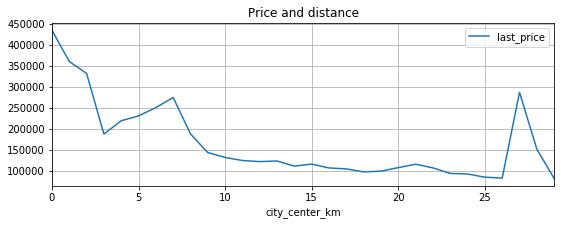

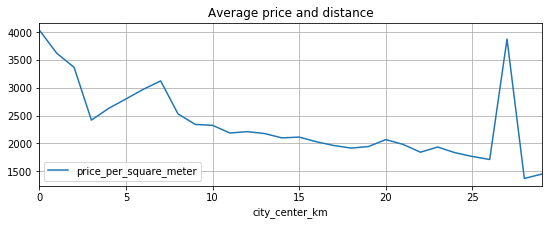

In [60]:
data_SP = data.loc[data['locality_name'] == 'Saint Petersburg'].copy()
#converting city_center_dist to km and rounding
data_SP['city_center_km'] = (data_SP['city_center_dist'] / 1000).round(0)
#calculating average price
data_SP.pivot_table(index = 'city_center_km', values = 'last_price').plot(grid = True, figsize= (9,3), title = ('Price and distance'))
#calculating average price per square meter
data_SP.pivot_table(index = 'city_center_km', values = 'price_per_square_meter').plot(grid = True, figsize= (9,3), title=('Average price and distance'))

### Conclusion

I took the data from Saint Petersburg to find the city center border. There is a significant drop in price after about 6 kilometers. That is where I will assume the border of the city center is.

### Factors that affect an apartment’s price in the city center

In [77]:
data_center = data_SP.query('city_center_km <= 6')

In [78]:
data_center

,date_posted,days_listed,last_price,bedrooms,kitchen_area,living_area,total_area,balconies,ceiling_height,floors_total,...,pond_dist,ponds_within_3000,price_per_square_meter,weekday_posted,month_posted,year_posted,floor_category,living_area_ratio,kitchen_area_ratio,city_center_km
63,2018-09-11,37.0,400000,3,16,68.00,118,0,3.00,9,...,779.0,1.0,3389.830508,1,9,2018,2,0.576271,0.135593,5.0
114,2019-02-07,NaN,80000,1,6,8.30,21,0,2.90,8,...,286.0,1.0,3809.523810,3,2,2019,2,0.395238,0.285714,6.0
121,2017-02-17,144.0,660000,3,24,86.00,180,4,2.90,9,...,NaN,0.0,3666.666667,4,2,2017,2,0.477778,0.133333,4.0
136,2018-08-01,163.0,130000,2,7,25.60,51,1,3.45,6,...,812.0,1.0,2549.019608,2,8,2018,2,0.501961,0.137255,4.0
137,2018-01-01,340.0,266216,2,26,31.52,85,1,2.70,10,...,133.0,3.0,3131.952941,0,1,2018,2,0.370824,0.305882,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23644,2018-04-26,166.0,99800,2,12,32.30,62,0,2.70,4,...,171.0,1.0,1609.677419,3,4,2018,3,0.520968,0.193548,4.0
23648,2017-05-12,621.0,202000,3,8,48.60,78,0,3.27,5,...,117.0,2.0,2589.743590,4,5,2017,3,0.623077,0.102564,1.0
23664,2015-12-10,816.0,180000,4,15,64.60,110,0,3.36,7,...,118.0,1.0,1636.363636,3,12,2015,2,0.587273,0.136364,5.0
23691,2016-10-13,519.0,189400,2,10,40.30,72,1,2.75,25,...,806.0,1.0,2630.555556,3,10,2016,2,0.559722,0.138889,4.0


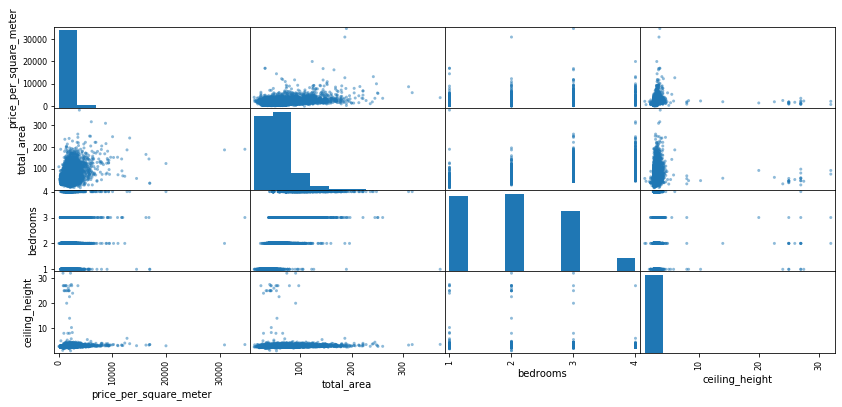

In [79]:
pd.plotting.scatter_matrix(data[['price_per_square_meter', 'total_area', 'bedrooms', 'ceiling_height']],figsize=[14,6])
plt.show()

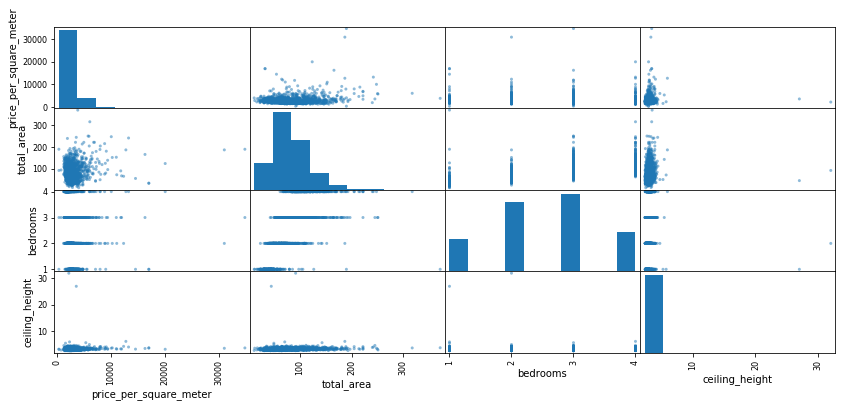

In [80]:
pd.plotting.scatter_matrix(data_center[['price_per_square_meter', 'total_area', 'bedrooms', 'ceiling_height']],figsize=[14,6])
plt.show()

In [81]:
#('last_price_vs._total_area') 
print('Correlation coefficient for Price vs. Area: {:.1f}'.format(data['last_price'].corr(data_center['total_area'])))

Correlation coefficient for Price vs. Area: 0.6


In [91]:
print('Correlation coefficient for Price vs. ceiling_height: {:.1f}'.format(data['last_price'].corr(data_center['ceiling_height'])))

Correlation coefficient for Price vs. ceiling_height: 0.1


In [83]:
#('last_price_vs._bedrooms') 
print('Correlation coefficient for Price vs. Bedrooms: {:.1f}'.format(data['last_price'].corr(data_center['bedrooms'])))

Correlation coefficient for Price vs. Bedrooms: 0.2


### Conclusion

The price with the center area has a little more density when it comes to total area but the information is pretty similar to suggest that there is no major difference between the two areas. The correlation for total area seems closer than the rest at 0.6.

#### Also identify the factors that affect an apartment’s price: number of rooms, floor, distance to the city center, and ad publication date.

### Bedrooms

Correlation coefficient: 0.3


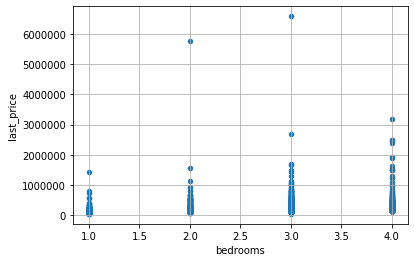

In [85]:
data_center.plot(x='bedrooms', y='last_price', kind='scatter', grid=True)
print('Correlation coefficient: {:.1f}'.format(data['last_price'].corr(data['bedrooms'])))

### Floors

Correlation coefficient: 0.1


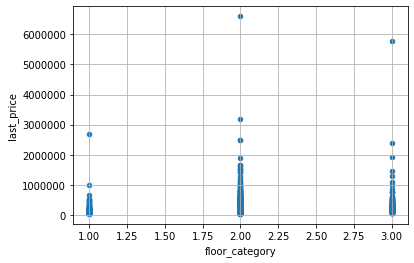

In [86]:
data_center.plot(x='floor_category', y='last_price', kind='scatter', grid=True)
print('Correlation coefficient: {:.1f}'.format(data['last_price'].corr(data_center['floor_category'])))

### Distance to city center

Correlation coefficient: -0.1


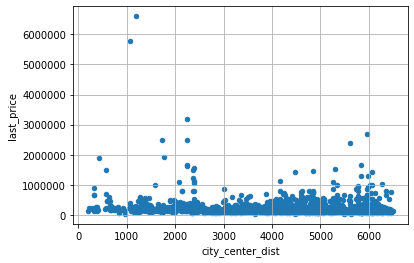

In [87]:
data_center.plot(x='city_center_dist', y='last_price', kind='scatter', grid=True)
print('Correlation coefficient: {:.1f}'.format(data_center['last_price'].corr(data_center['city_center_dist'])))

### Ad publication date

Correlation coefficient: -0.0


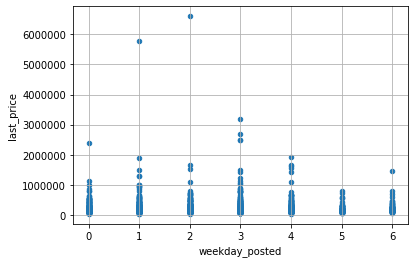

In [88]:
data_center.plot(x='weekday_posted', y='last_price', kind='scatter', grid=True)
print('Correlation coefficient: {:.1f}'.format(data['last_price'].corr(data['weekday_posted'])))

Correlation coefficient: -0.0


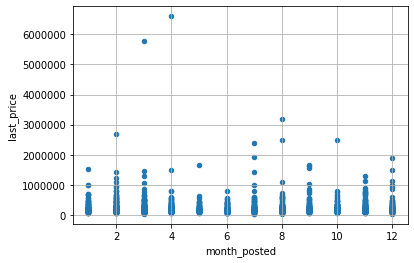

In [89]:
data_center.plot(x='month_posted', y='last_price', kind='scatter', grid=True)
print('Correlation coefficient: {:.1f}'.format(data['last_price'].corr(data['month_posted'])))

Correlation coefficient: -0.0


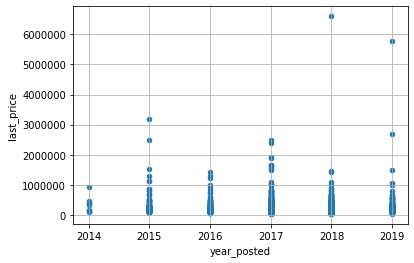

In [90]:
data_center.plot(x='year_posted', y='last_price', kind='scatter', grid=True)
print('Correlation coefficient: {:.1f}'.format(data['last_price'].corr(data['year_posted'])))

### Conclusion

I don't really see how any of these factors have impacted the price of the property except the square meters. The highest correlation is 0.6 for total_area and 0.3 for bedrooms. The rest of the data is either 0.0 or 0.1 which has no correlation at all.

### Step 5. Overall conclusion

In the end of checking all of the data I haven't found any correlation between the price of the properties and any of the other data about them except perhaps the size of the property with the price. Which is why bedrooms has some correlation.

Corrected Conclusion: Overall after checking the data and adding in the missing values that I could I found a few outliers of prices and total_area which seemed to be bigger apartments with many rooms.  

Nothing really had any correlation with the price except for the area of the property. We can see this with the total_area of the properties which had the closest correlation of 0.6. The amount of bedrooms which are connected to total_area also has a correlation of 0.3.

### Project completion checklist

Mark the completed tasks with 'x'. Then press Shift+Enter.

- [x]  file opened
- [x]  files explored (first rows printed, info() method)
- [x]  missing values determined
- [x]  missing values filled in
- [x]  clarification of the discovered missing values provided
- [x]  data types converted
- [x]  explanation of which columns had the data types changed and why
- [x]  calculated and added to the table: the price per square meter
- [x]  calculated and added to the table: the day of the week, month, and year that the ad was published
- [x]  calculated and added to the table: which floor the apartment is on (first, last, or other)
- [x]  calculated and added to the table: the ratio between the living space and the total area, as well as between the kitchen space and the total area
- [x]  the following parameters investigated: square area, price, number of rooms, and ceiling height
- [x]  histograms for each parameter created
- [x]  task completed: "Examine the time it's taken to sell the apartment and create a histogram. Calculate the mean and median and explain the average time it usually takes to complete a sale. When can a sale be considered extra quick or taken an extra slow?"
- [x]  task completed: "Remove rare and outlying values and describe the specific details you've discovered."
- [x]  task completed: "Which factors have had the biggest influence on an apartment’s value? Examine whether the value depends on price per meter, number of rooms, floor (top or bottom), or the proximity to the downtown area. Also study the correlation to the ad posting date: day of the week, month, and year. "Select the 10 places with the largest number of ads and then calculate the average price per square meter in these localities. Select the locations with the highest and lowest housing prices. You can find this data by name in the ’*locality_name’* column. "
- [x]  task completed: "Thoroughly look at apartment offers: each apartment has information about the distance to the downtown area. Select apartments in Saint Petersburg (*‘locality_name’*). Your task is to pinpoint which area is considered to be downtown. Create a column with the distance to the downtown area in km and round to the nearest whole number. Next, calculate the average price for each kilometer. Build a graph to display how prices are affected by the distance to the downtown area. Define the turning point where the graph significantly changes. This will indicate downtown. "
- [x]  task completed: "Select a segment of apartments in the downtown. Analyze this area and examine the following parameters: square area, price, number of rooms, ceiling height. Also identify the factors that affect an apartment’s price (number of rooms, floor, distance to the downtown area, and ad publication date). Draw your conclusions. Are they different from the overall conclusions about the entire city?"
- [x]  each stage has a conclusion
- [x]  overall conclusion drawn